# Patient Data Extraction


### Extracting the CHB-MIT Scalp EEG Database & Analyzing data of 2 patients

Installing all the requirements:

In [ ]:
! pip install pyedflib mne matplotlib numpy pandas


### Reading the EDF File

Extracting EDF parameters from c:\Users\prani\OneDrive\Desktop\IEEE EMBS Internship\notebooks\data\chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\prani\AppData\Local\Temp\ipykernel_13608\1016257616.py:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf('data/chb01_03.edf', preload=True)


Using matplotlib as 2D backend.


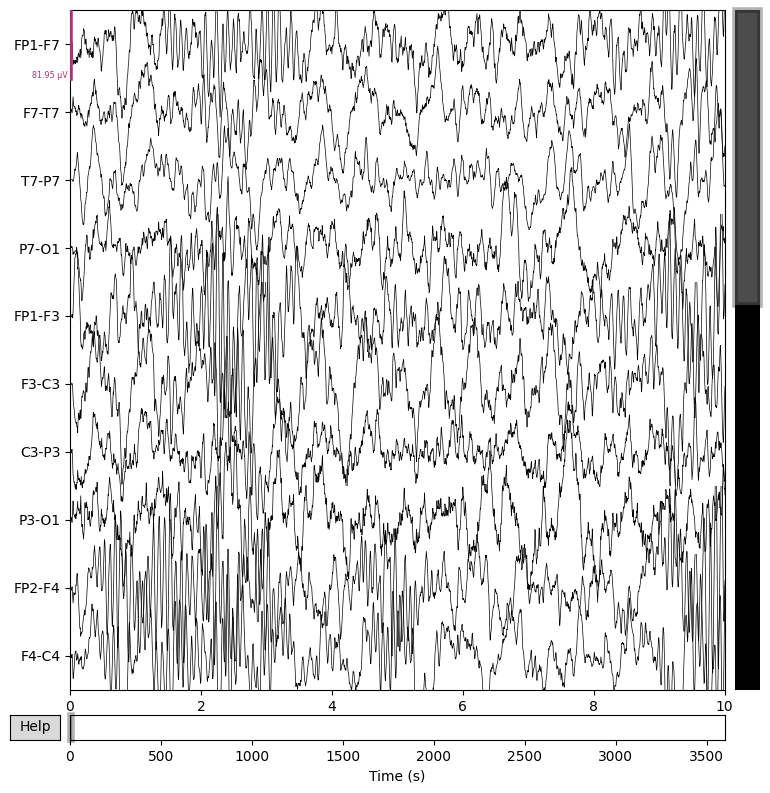

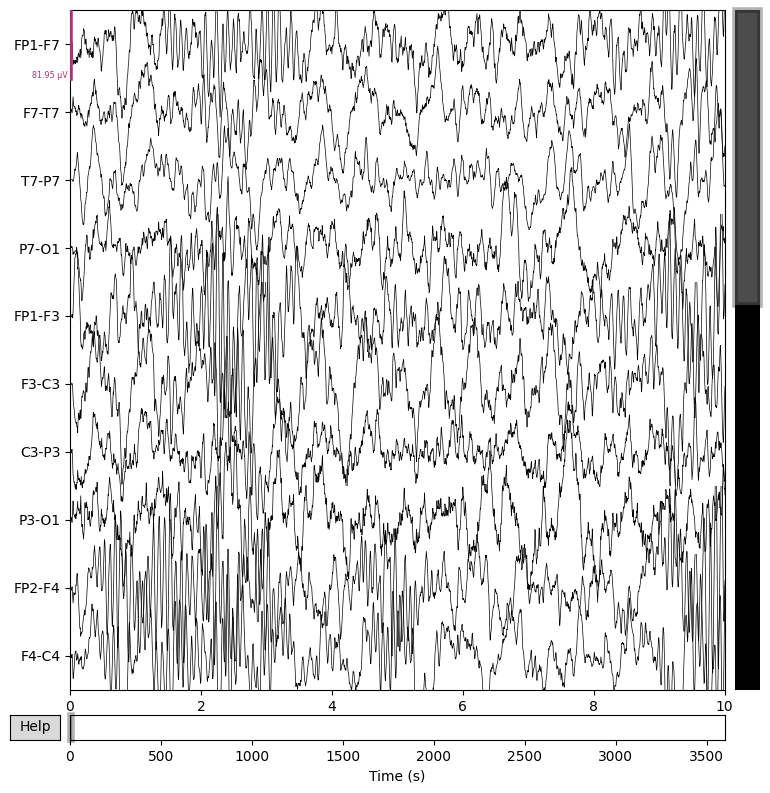

In [6]:
import mne

# Load the EDF file
raw = mne.io.read_raw_edf('data/chb01_03.edf', preload=True)

# Check basic info
raw.info

# Plot EEG signals
raw.plot(n_channels=10, scalings='auto', title='EEG Raw Data', show=True)


### Visualizing Time Specific Window

Extracting EDF parameters from c:\Users\prani\OneDrive\Desktop\IEEE EMBS Internship\notebooks\data\chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\prani\AppData\Local\Temp\ipykernel_13608\3290061064.py:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf("data/chb01_03.edf", preload=True)


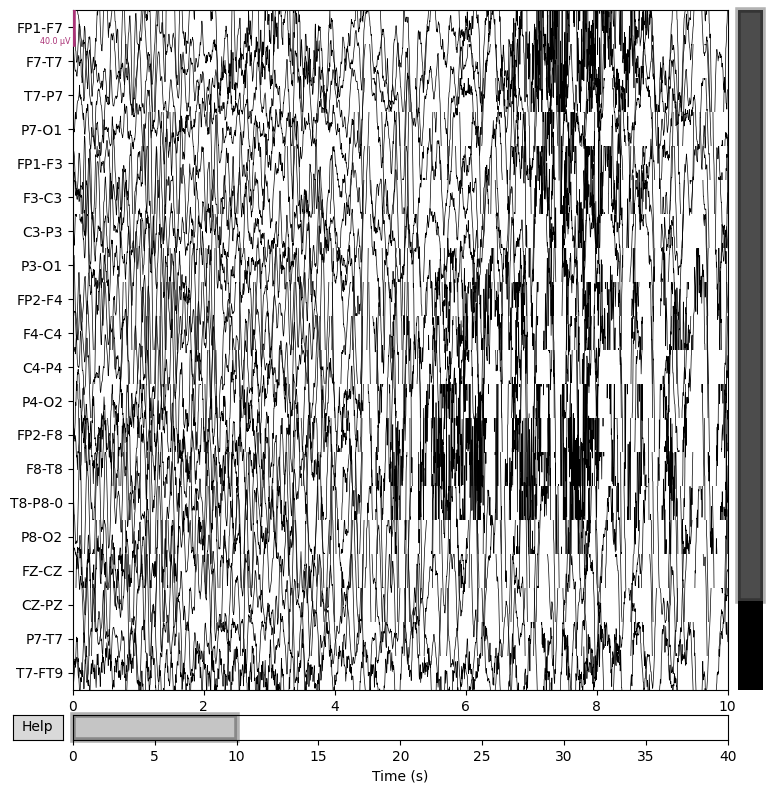

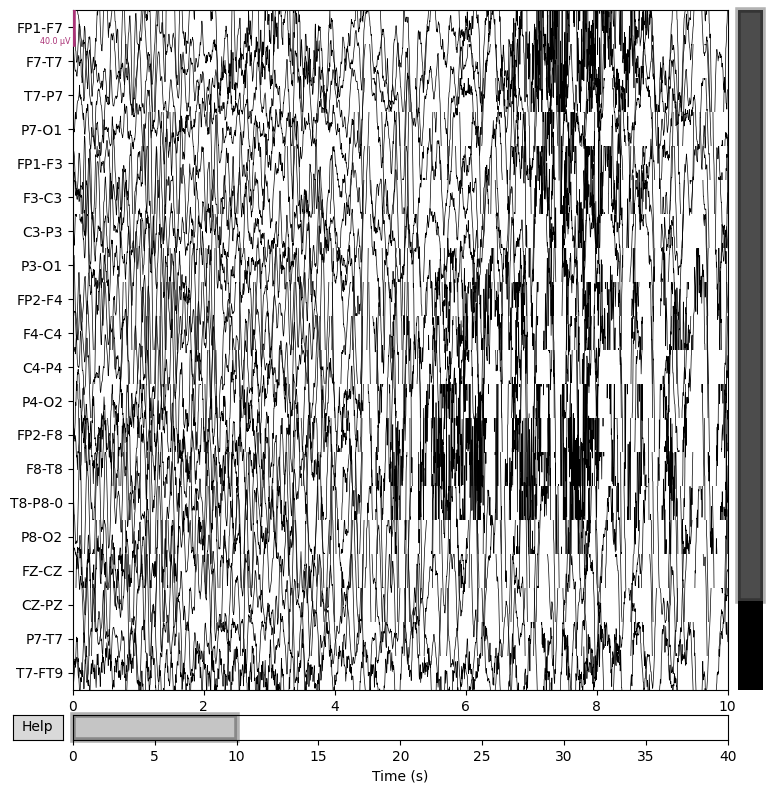

In [8]:
import mne

# Load the EEG data
raw = mne.io.read_raw_edf("data/chb01_03.edf", preload=True)

# Seizure occurs from 2996s to 3036s in the recording
seizure_start = 2996
seizure_end = 3036

# Crop EEG to seizure segment
seizure_segment = raw.copy().crop(tmin=seizure_start, tmax=seizure_end)

# Plot seizure segment
seizure_segment.plot(title='Seizure EEG Segment', show=True)
